<a href="https://colab.research.google.com/github/LuizMeleiroUFRRJ/VisaoComputacional_CarlosMelo/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_I2AI_DesafioIniciante_LuizMeleiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafio Iniciante: Luiz Augusto**

**Desafio Iniciante:** Subir uma foto da face (foto do próprio aluno) e detectar + filtar para aparecer apenas as *landmarks* da face.

**Desafio Avançado:** Implementar um detector de fadiga (*drowsiness detector*) usando o MediaPipe.Recomendo usar a máquia local para quem possui e acessar a sua webcam.

> Milestones:
* M1: Identificar e filtrar os pontos da face, na webcam em real-time.
* M2: Calcular o EAR (proporção entre os olhos)
* Acionar o "alarme" de texto com aviso, após 40 frames consecutivos abaixo da EAR.

**Referências**

[https://pyimagesearch.com/2017/05/08/drowsiness-detection-opencv/](https://pyimagesearch.com/2017/05/08/drowsiness-detection-opencv/)

[https://learnopencv.com/driver-drowsiness-detection-using-mediapipe-in-python/](https://learnopencv.com/driver-drowsiness-detection-using-mediapipe-in-python/)


## Conhecendo a MediaPipe

*MediaPipe* é uma plataforma de código aberto para a criação de soluções de percepção situacional. Fornecida pelo Google, ela oferece uma estrutura para construir aplicativos e soluções que necessitam de processamento de fluxos de dados multimídia, incluindo, mas não se limitando a, vídeo, áudio e dados de sensores. *MediaPipe* foi criado com a missão de acelerar o ciclo de desenvolvimento de aplicações multimídia em várias plataformas.

Para a tarefa de *Pose Estimation*, nós iremos utilizar o *MediaPipe* para:

1. **Detectar e desenhar *pose landmarks***: *MediaPipe* nos permitirá identificar os principais pontos do corpo, ou *landmarks*, e desenhá-los em nossas imagens e vídeos para uma visualização mais intuitiva.
2. **Desenhar *landmark connections***: Além de detectar *landmarks* individuais, o *MediaPipe* também permite desenhar conexões entre estes, facilitando a compreensão da postura geral.
3. **Obter o pixel de coordenada da *landmark***: Com o *MediaPipe*, nós poderemos extrair as coordenadas dos pixels correspondentes a cada *landmark*, permitindo análises mais detalhadas.

### Pose Landmark Model - BlazePose GHUM 3D

O modelo de *landmark* para estimativa de pose que utilizaremos é o *BlazePose GHUM 3D*, também oferecido pelo Google através do *MediaPipe*. Este modelo fornece uma representação completa de 3D do corpo humano, incluindo 33 *landmarks* que cobrem todo o corpo.<br><br>

<img src="https://sigmoidal.ai/wp-content/uploads/2023/07/68747470733a2f2f6d65646961706970652e6465762f696d616765732f6d6f62696c652f706f73655f747261636b696e675f66756c6c5f626f64795f6c616e646d61726b732e706e67.png" width=500>

<br>O modelo [*BlazePose GHUM 3D*](https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md) foi treinado em um grande conjunto de dados de poses e movimentos humanos, permitindo-lhe prever com precisão os *landmarks* corporais mesmo em diferentes poses e orientações. Isso o torna uma ferramenta poderosa para nossas análises de desempenho esportivo. Veja a lista completa dos *landmarks*:

* 0 - Nariz
* 1 - Olho esquerdo (interno)
* 2 - Olho esquerdo
* 3 - Olho esquerdo (externo)
* 4 - Olho direito (interno)
* 5 - Olho direito
* 6 - Olho direito (externo)
* 7 - Orelha esquerda
* 8 - Orelha direita
* 9 - Boca (lado esquerdo)
* 10 - Boca (lado direito)
* 11 - Ombro esquerdo
* 12 - Ombro direito
* 13 - Cotovelo esquerdo
* 14 - Cotovelo direito
* 15 - Pulso esquerdo
* 16 - Pulso direito
* 17 - Dedo mínimo esquerdo
* 18 - Dedo mínimo direito
* 19 - Dedo indicador esquerdo
* 20 - Dedo indicador direito
* 21 - Polegar esquerdo
* 22 - Polegar direito
* 23 - Quadril esquerdo
* 24 - Quadril direito
* 25 - Joelho esquerdo
* 26 - Joelho direito
* 27 - Tornozelo esquerdo
* 28 - Tornozelo direito
* 29 - Calcanhar esquerdo
* 30 - Calcanhar direito
* 31 - Dedão do pé esquerdo
* 32 - Dedão do pé direito

Cada um desses *landmarks* representa um ponto chave no corpo humano, permitindo-nos analisar a pose e o movimento do corpo de forma abrangente e precisa.



## Pipeline para estimação de pose

In [ ]:
# instalação das bibliotecas necessárias
!pip install --upgrade opencv-contrib-python -q
!pip install mediapipe -q

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

%matplotlib inline

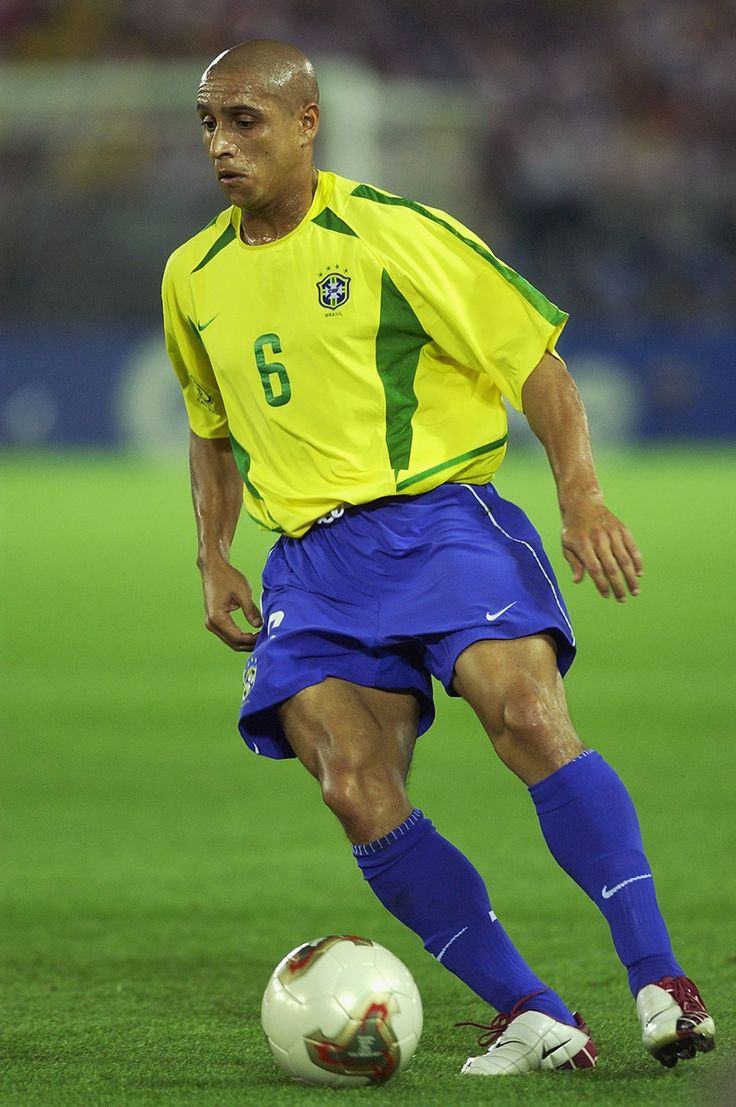

In [20]:
# Baixando a imagem a ser analisada.
!wget https://sigmoidal.ai/wp-content/uploads/2023/07/roberto-carlos-o-melhor-do-mundo.jpg -q  # Baixar arquivo de URL


!wget https://github.com/LuizMeleiroUFRRJ/VisaoComputacional_CarlosMelo.git/LuizAugusto.jpg -q  # Baixar arquivo de Github
!wget https://github.com/LuizMeleiroUFRRJ/VisaoComputacional_CarlosMelo.git/roberto-carlos-o-melhor-do-mundo.jpg -q  # Baixar arquivo de Github
!wget https://github.com/LuizMeleiroUFRRJ/VisaoComputacional_CarlosMelo.git/FotoMeleiro.jpg -q
!wget https://github.com/LuizMeleiroUFRRJ/VisaoComputacional_CarlosMelo.git/carlos.jpg -q

# Carregando a imagem usando OpenCV.
img = cv2.imread("roberto-carlos-o-melhor-do-mundo.jpg")
img = cv2.imread("LuizAugusto.jpg")
img = cv2.imread("FotoMeleiro.jpg")
img = cv2.imread("carlos.jpg")

from google.colab.patches import cv2_imshow
img=cv2.imread("roberto-carlos-o-melhor-do-mundo.jpg")
cv2_imshow(img)

#cv2.imshow('Luiz Augusto',img)
# Aguardar até que uma tecla seja pressionada
#cv2.waitKey(0)
# Fechar todas as janelas
#cv2.destroyAllWindows()


# Obtendo a largura e a altura da imagem.
img_width = img.shape[1]
img_height = img.shape[0]

# Criando uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[...,::-1])
plt.show()

In [11]:
# Inicializando os módulos Pose e Drawing do MediaPipe.
#mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

mp_drawing = mp.solutions.drawing_utils

In [ ]:
#with mp_pose.Pose(static_image_mode=True) as pose:
with mp_face_mesh.FaceMesh(static_image_mode=True) as face_mesh:
    """
    Esta função utiliza a biblioteca MediaPipe para detectar e desenhar 'landmarks'
    (pontos de referência) em uma imagem. Os 'landmarks' são pontos de interesse
    que representam diferentes partes do corpo detectadas na imagem.

    Args:
        static_image_mode: um booleano para informar se a imagem é estática (True) ou sequencial (False).
    """

    # Faz uma cópia da imagem original.
    annotated_img = img.copy()

    # Processa a imagem.
    #results = pose.process(img)
    results = face_mesh.process(img)

    # Define o raio do círculo para desenho dos 'landmarks'.
    # O raio é escalado como uma porcentagem da altura da imagem.
    #circle_radius = int(.007 * img_height)
    circle_radius = int(.001 * img_height)


    # Especifica o estilo de desenho dos 'landmarks'.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)

    # Desenha os 'landmarks' na imagem.
#    mp_drawing.draw_landmarks(annotated_img,
#                              landmark_list=results.pose_landmarks,
#                              landmark_drawing_spec=point_spec)

    mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.face_landmarks,
                              landmark_drawing_spec=point_spec)

# Cria uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[:, :, ::-1])
plt.show()


AttributeError: type object 'SolutionOutputs' has no attribute 'face_landmarks'

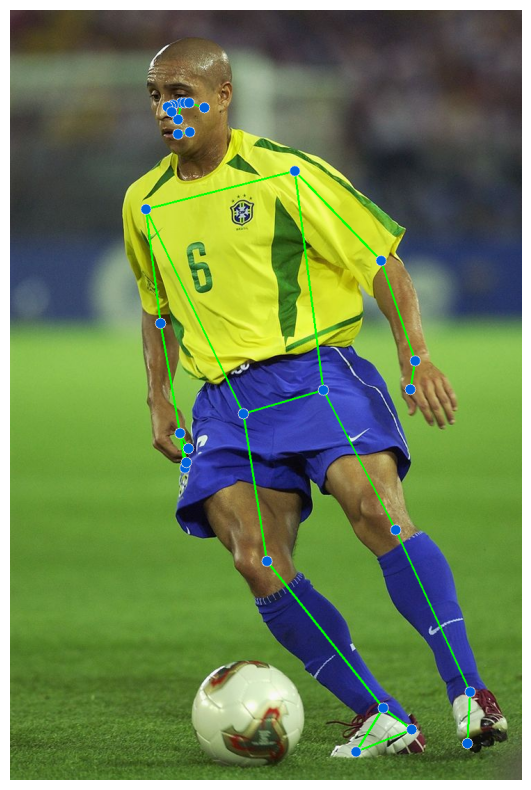

In [ ]:
# Faz uma cópia da imagem original.
annotated_img = img.copy()

# Especifica o estilo de desenho das conexões dos landmarks.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)

# Desenha tanto os pontos dos landmarks quanto as conexões.
mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
    )

# Cria uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[...,::-1])
plt.show()


In [ ]:
results.pose_landmarks.landmark[0]

x: 0.32829982
y: 0.141887635
z: -0.49431327
visibility: 0.999033332

In [ ]:
mp_pose.PoseLandmark.LEFT_KNEE

<PoseLandmark.LEFT_KNEE: 25>

Coordenadas do joelho esquerdo: ( 554 , 747 )
Coordenadas do tornozelo esquerdo: ( 661 , 980 )
Coordenadas do calcanhar esquerdo: ( 671 , 1011 )
Coordenadas do índice de pé esquerdo: ( 657 , 1054 )


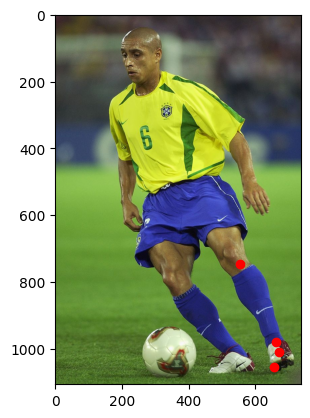

In [ ]:
# Seleciona as coordenadas dos pontos de interesse.
l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)

# Imprime as coordenadas na tela.
print('Coordenadas do joelho esquerdo: (', l_knee_x,',',l_knee_y,')' )
print('Coordenadas do tornozelo esquerdo: (', l_ankle_x,',',l_ankle_y,')' )
print('Coordenadas do calcanhar esquerdo: (', l_heel_x,',',l_heel_y,')' )
print('Coordenadas do índice de pé esquerdo: (', l_foot_index_x,',',l_foot_index_y,')' )

# Exibindo um gráfico com os pontos selecionados.
fig, ax = plt.subplots()
ax.imshow(img[:, :, ::-1])
ax.plot([l_knee_x, l_ankle_x, l_heel_x, l_foot_index_x], [l_knee_y, l_ankle_y, l_heel_y, l_foot_index_y], 'ro')
plt.show()


In [ ]:
cv2.imwrite("output.png", annotated_img)

True